# PR0202: Listas en Redis

### 1.- Crea un script en Python que use la librería `redis`.

In [60]:
import redis

pedidos_clave = "pedidos"

r = redis.Redis(
    host = "redis",
    port = 6379,
    db = 0,
    decode_responses = True
)

print(r.ping())

True


### 2.- Define una función `agregar_pedido(cliente, producto)`

In [61]:
import json

In [1]:
def agregar_pedido(cliente, producto, urgente = False):    
    num_id = f"pedido_{r.llen(pedidos_clave) + 1}" if r.exists(pedidos_clave) else "pedido_1"
    
    pedido_json = {
        "id": num_id,
        "cliente": cliente,
        "producto": producto,
        "cantidad": 1,
        "urgente": urgente,
    }

    pedido = json.dumps(pedido_json)

    if urgente:
        r.lpush(pedidos_clave, pedido)
    else:
        r.rpush(pedidos_clave, pedido)

### 3.- Define una función `procesar_pedido()` que extraiga un pedido de la lista de `pedidos`.

In [64]:
def procesar_pedido():
    pedido = json.loads(r.lpop("pedidos"))
    print(f"Procesando pedido: {pedido}")

### 4.- Inserta 5 pedidos iniciales llamando a la función `agregar_pedido()`.

In [72]:
agregar_pedido("Carlos Pérez", "Portátil")
agregar_pedido("Juan López", "Auriculares")
agregar_pedido("María Martínez", "Altavoces")
agregar_pedido("Lucía González", "Móvil")
agregar_pedido("Luis García", "Ratón")

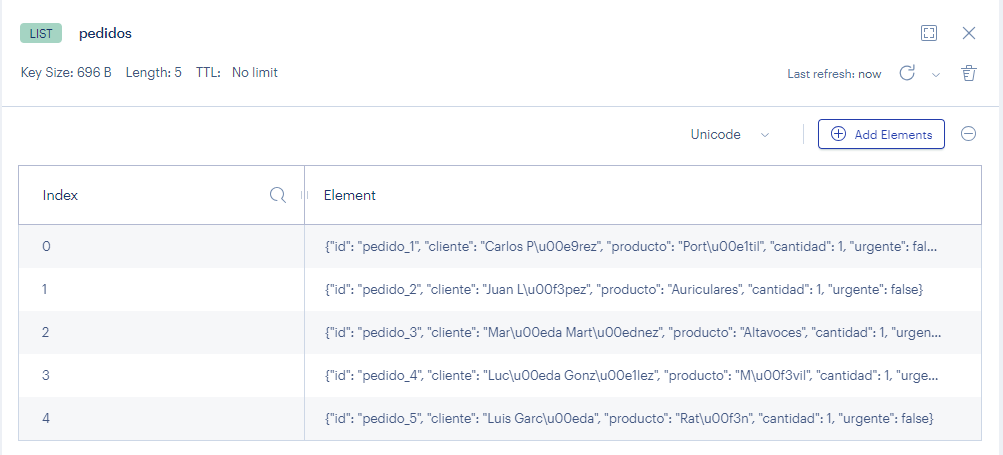

### 5.- Muesta los pedidos actuales con 'LRANGE`.

In [66]:
print(r.lrange(pedidos_clave, 0, -1))

['{"id": "pedido_1", "cliente": "Carlos P\\u00e9rez", "producto": "Port\\u00e1til", "cantidad": 1, "urgente": false}', '{"id": "pedido_2", "cliente": "Juan L\\u00f3pez", "producto": "Auriculares", "cantidad": 1, "urgente": false}', '{"id": "pedido_3", "cliente": "Mar\\u00eda Mart\\u00ednez", "producto": "Altavoces", "cantidad": 1, "urgente": false}', '{"id": "pedido_4", "cliente": "Luc\\u00eda Gonz\\u00e1lez", "producto": "M\\u00f3vil", "cantidad": 1, "urgente": false}', '{"id": "pedido_5", "cliente": "Luis Garc\\u00eda", "producto": "Rat\\u00f3n", "cantidad": 1, "urgente": false}']


### 6.- Inserta 2 pedidos adicionales.

In [67]:
agregar_pedido("Víctor García", "Teclado")
agregar_pedido("Marcos Viñuela", "Torre de Ordenador")

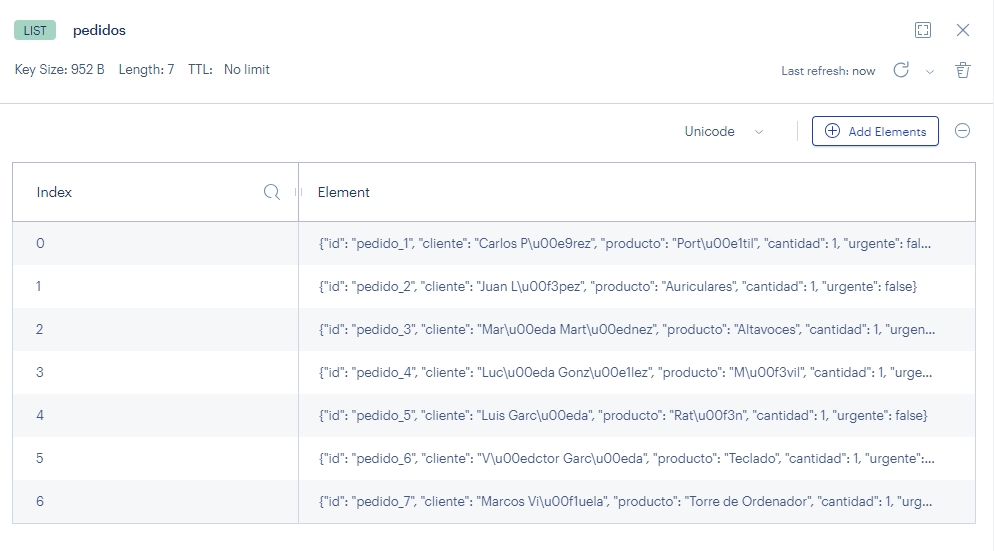

### 7.- Procesa todos los pedidos.

In [68]:
for i in range(r.llen(pedidos_clave)):
    procesar_pedido()

Procesando pedido: {'id': 'pedido_1', 'cliente': 'Carlos Pérez', 'producto': 'Portátil', 'cantidad': 1, 'urgente': False}
Procesando pedido: {'id': 'pedido_2', 'cliente': 'Juan López', 'producto': 'Auriculares', 'cantidad': 1, 'urgente': False}
Procesando pedido: {'id': 'pedido_3', 'cliente': 'María Martínez', 'producto': 'Altavoces', 'cantidad': 1, 'urgente': False}
Procesando pedido: {'id': 'pedido_4', 'cliente': 'Lucía González', 'producto': 'Móvil', 'cantidad': 1, 'urgente': False}
Procesando pedido: {'id': 'pedido_5', 'cliente': 'Luis García', 'producto': 'Ratón', 'cantidad': 1, 'urgente': False}
Procesando pedido: {'id': 'pedido_6', 'cliente': 'Víctor García', 'producto': 'Teclado', 'cantidad': 1, 'urgente': False}
Procesando pedido: {'id': 'pedido_7', 'cliente': 'Marcos Viñuela', 'producto': 'Torre de Ordenador', 'cantidad': 1, 'urgente': False}


Después de procesar
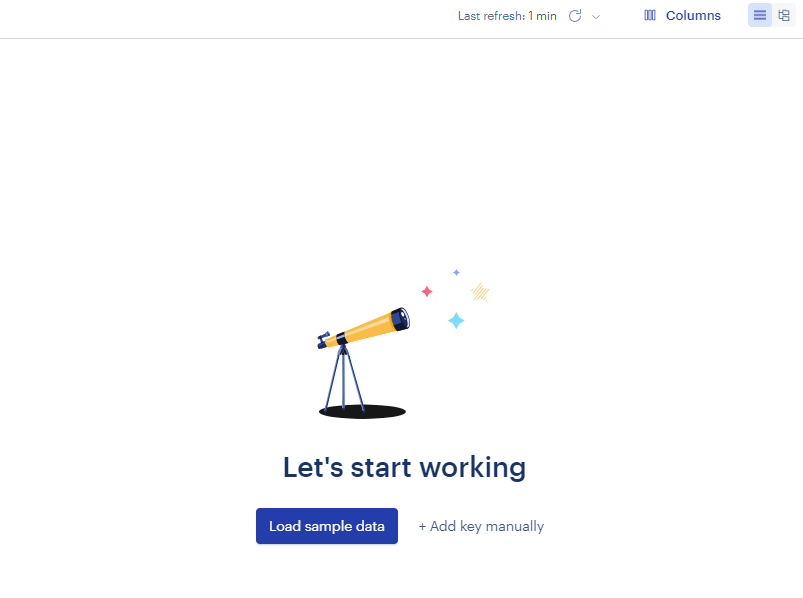

### 8.- Inserta un pedido urgente

In [74]:
agregar_pedido("María Pérez", "Alfombrilla", True)

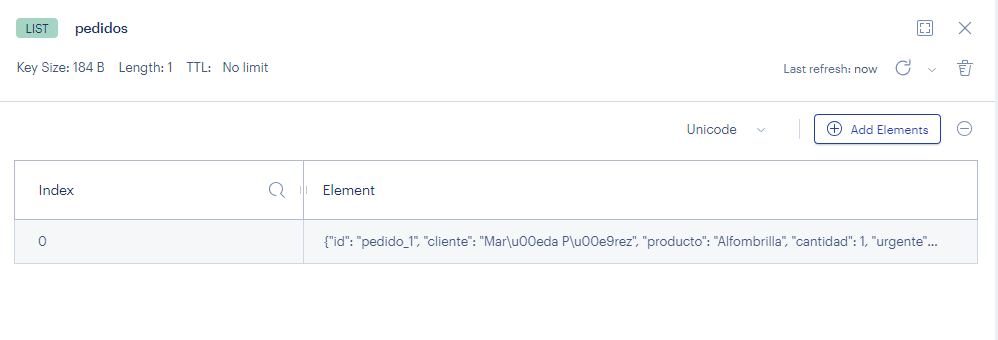

In [71]:
procesar_pedido()

Procesando pedido: {'id': 'pedido_1', 'cliente': 'María Pérez', 'producto': 'Alfombrilla', 'cantidad': 1, 'urgente': True}


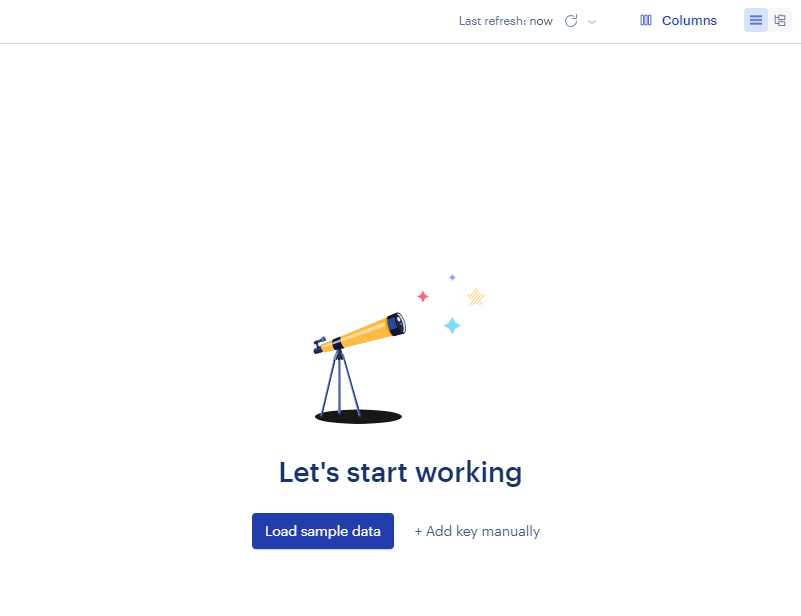

Ejecutando el paso 4 antes.

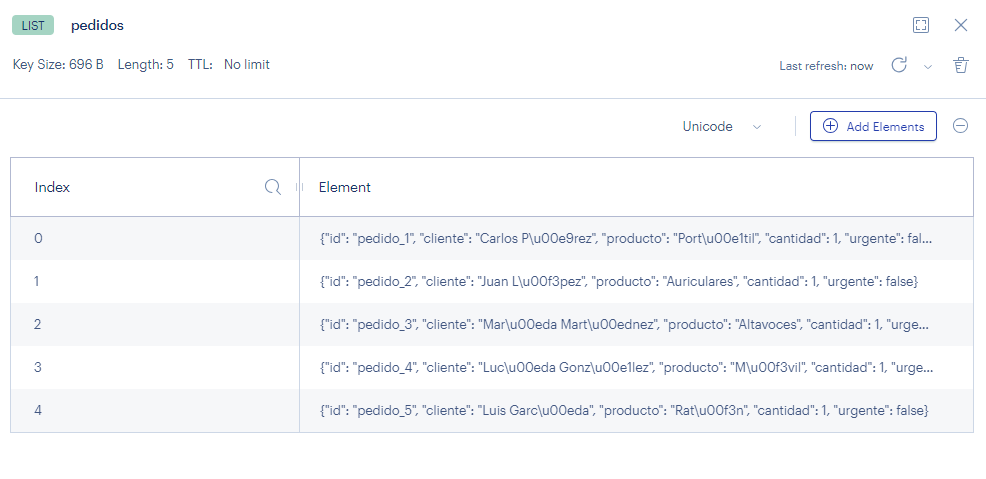

Agregamos el urgente.

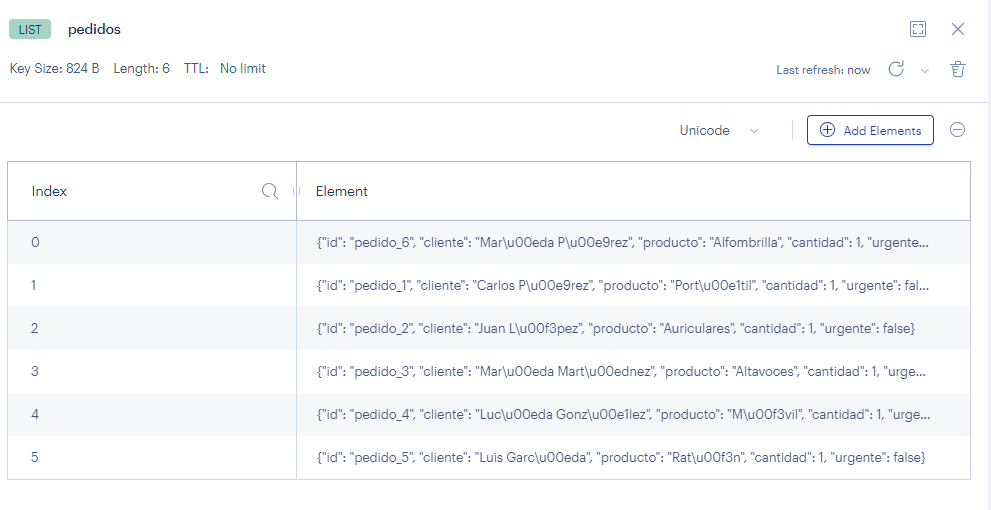

Procesamiento

In [75]:
for i in range(r.llen(pedidos_clave)):
    procesar_pedido()

Procesando pedido: {'id': 'pedido_6', 'cliente': 'María Pérez', 'producto': 'Alfombrilla', 'cantidad': 1, 'urgente': True}
Procesando pedido: {'id': 'pedido_1', 'cliente': 'Carlos Pérez', 'producto': 'Portátil', 'cantidad': 1, 'urgente': False}
Procesando pedido: {'id': 'pedido_2', 'cliente': 'Juan López', 'producto': 'Auriculares', 'cantidad': 1, 'urgente': False}
Procesando pedido: {'id': 'pedido_3', 'cliente': 'María Martínez', 'producto': 'Altavoces', 'cantidad': 1, 'urgente': False}
Procesando pedido: {'id': 'pedido_4', 'cliente': 'Lucía González', 'producto': 'Móvil', 'cantidad': 1, 'urgente': False}
Procesando pedido: {'id': 'pedido_5', 'cliente': 'Luis García', 'producto': 'Ratón', 'cantidad': 1, 'urgente': False}


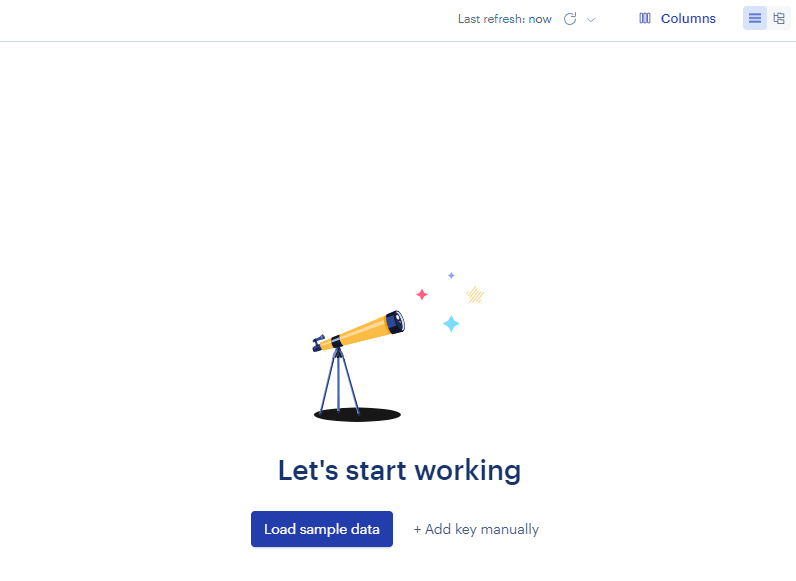

[Volver](../index.md)